In [1]:
import pandas as pd
import matplotlib.pyplot as pyplot

from sklearn import linear_model
import numpy as np

import os

In [2]:
DATA_DIR = '../input'
DATA_FILE = 'indian_liver_patient.csv'

In [3]:
data = pd.read_csv(os.path.join(DATA_DIR, DATA_FILE))
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


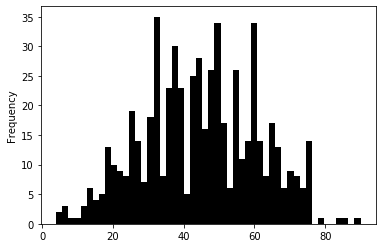

In [5]:
data.Age.plot.hist(color = 'black', bins = 50)

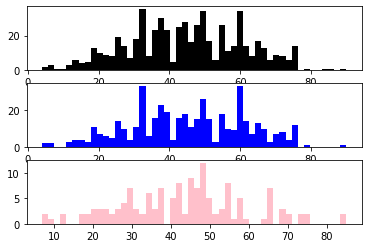

In [7]:
ax1 =  pyplot.subplot(311)
pyplot.hist(data.Age, bins = 50, color = 'black')
ax2 =  pyplot.subplot(312)
pyplot.hist(data[data.Gender =='Male'].Age, bins = 50, color = 'blue')
ax3 =  pyplot.subplot(313)
pyplot.hist(data[data.Gender =='Female'].Age, bins = 50, color = 'pink')
pyplot.show()

In [8]:
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


In [9]:
correlation = data.corr().abs().unstack()
correlation = correlation.loc[(correlation<1)&(correlation>0.5)].drop_duplicates()
correlation

Total_Bilirubin           Direct_Bilirubin              0.874618
Alamine_Aminotransferase  Aspartate_Aminotransferase    0.791966
Total_Protiens            Albumin                       0.784053
Albumin                   Albumin_and_Globulin_Ratio    0.689632
dtype: float64

In [10]:
list(correlation.index)

[('Total_Bilirubin', 'Direct_Bilirubin'),
 ('Alamine_Aminotransferase', 'Aspartate_Aminotransferase'),
 ('Total_Protiens', 'Albumin'),
 ('Albumin', 'Albumin_and_Globulin_Ratio')]

## Study 'Total_Bilirubin' vs. 'Direct_Bilirubin' dependency

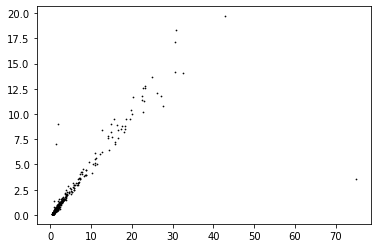

In [11]:
pyplot.scatter(x = data['Total_Bilirubin'], y = data['Direct_Bilirubin'], color = 'black', s = 0.5)
pyplot.show()

In [29]:
data['Gender'].value_counts()

Male      440
Female    142
Name: Gender, dtype: int64

#### Find dependency rule and drop values with great distance to dependency

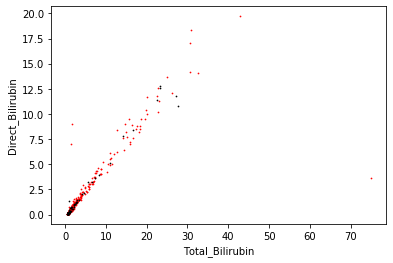

In [13]:
male = data[data.Gender =='Male']
female = data[data.Gender =='Female']
pyplot.scatter(x = male['Total_Bilirubin'], y = male['Direct_Bilirubin'], color = 'red', s = 0.5)
pyplot.scatter(x = female['Total_Bilirubin'], y = female['Direct_Bilirubin'], color = 'black', s = 0.5)
pyplot.xlabel('Total_Bilirubin')
pyplot.ylabel('Direct_Bilirubin')
pyplot.show()

In [14]:
model = linear_model.LinearRegression()
X = np.array(data['Total_Bilirubin']).reshape((len(data['Total_Bilirubin']),1))
Y = np.array(data['Direct_Bilirubin']).reshape((len(data['Direct_Bilirubin']),1))
model.fit(X,Y)
print("Linear Regression Model Coefs:",model.coef_[0][0],model.intercept_[0])
print("The score is: ",model.score(X,Y))

Linear Regression Model Coefs: 0.3955799627429304 0.18116743679724934
The score is:  0.7649565236811194


#### Direct_Bilirubin = 0.396 *Total_Bilirubin +0.765

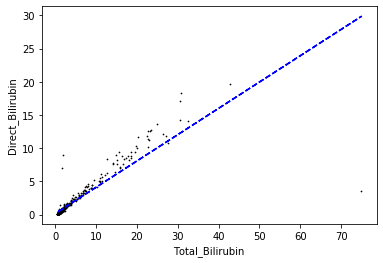

In [15]:
Z = [0.3955799627429304*x+ 0.18116743679724934 for x in X]

pyplot.scatter(X, Y, color = 'black', s = 0.5 )
pyplot.plot(X, Z,"b--")
pyplot.xlabel('Total_Bilirubin')
pyplot.ylabel('Direct_Bilirubin')
pyplot.show()

#### get points that have dig distance to dependency

In [16]:
#distance from point (x0,y0) to line y = kx+b
def distance(x0,y0,k,b):
    x1=(x0+k*(y0-b))/(k*k+1)
    y1=k*x1+b
    d=np.sqrt(np.square(x1-x0)+np.square(y1-y0))
    return np.abs(d)
out = data
out = out.assign(distance = lambda x: 
           distance(
               x['Total_Bilirubin'], 
               x['Direct_Bilirubin'], 
               0.3955799627429304, 
               0.18116743679724934)
          ).sort_values(by = 'distance', ascending = False)

out.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,distance
166,55,Male,75.0,3.6,332,40,66,6.2,2.5,0.6,1,24.409228
246,55,Male,1.8,9.0,272,22,79,6.1,2.7,0.7,1,7.538399
261,33,Male,1.5,7.0,505,205,140,7.5,3.9,1.0,1,5.788978
531,40,Male,30.8,18.3,285,110,186,7.9,2.7,0.5,1,5.518852
504,32,Male,30.5,17.1,218,39,79,5.5,2.7,0.9,1,4.513341


In [17]:
data = out[out.distance<10]
data.sort_values(by = 'distance', ascending = False).head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,distance
246,55,Male,1.8,9.0,272,22,79,6.1,2.7,0.7,1,7.538399
261,33,Male,1.5,7.0,505,205,140,7.5,3.9,1.0,1,5.788978
531,40,Male,30.8,18.3,285,110,186,7.9,2.7,0.5,1,5.518852
504,32,Male,30.5,17.1,218,39,79,5.5,2.7,0.9,1,4.513341
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.5,1,3.374871


#### Make linear regression again

In [18]:
model = linear_model.LinearRegression()
X = np.array(data['Total_Bilirubin']).reshape((len(data['Total_Bilirubin']),1))
Y = np.array(data['Direct_Bilirubin']).reshape((len(data['Direct_Bilirubin']),1))
model.fit(X,Y)
print("Linear Regression Model Coefs:",model.coef_[0][0],model.intercept_[0])
print("The score is: ",model.score(X,Y))

Linear Regression Model Coefs: 0.5046176958418559 -0.11999042174384544
The score is:  0.9600557894944014


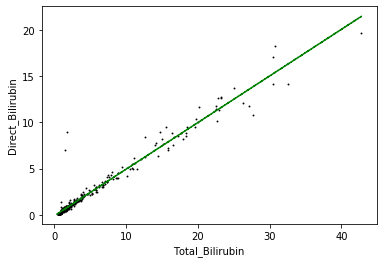

In [19]:
Z = [0.5046176958418559*x+ -0.11999042174384544 for x in X]
pyplot.scatter(X, Y, color = 'black', s= 0.8)
pyplot.plot(X, Z,"g--")
pyplot.xlabel('Total_Bilirubin')
pyplot.ylabel('Direct_Bilirubin')
pyplot.show()

## Study Alamine_Aminotransferase vs. Aspartate_Aminotransferase  dependency

Linear Regression Model Coefs: 0.5005707160767192 25.72760708332826
The score is:  0.6271958642020454


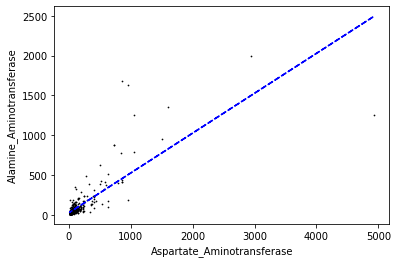

In [23]:
model = linear_model.LinearRegression()
X = np.array(data['Aspartate_Aminotransferase']).reshape((len(data['Aspartate_Aminotransferase']),1))
Y = np.array(data['Alamine_Aminotransferase']).reshape((len(data['Alamine_Aminotransferase']),1))
model.fit(X,Y)
print("Linear Regression Model Coefs:",model.coef_[0][0],model.intercept_[0])
print("The score is: ",model.score(X,Y))

Z = [0.5005707160767192*x+ 25.72760708332826 for x in X]

pyplot.scatter(X, Y, color = 'black', s = 0.5 )
pyplot.plot(X, Z,"b--")
pyplot.xlabel('Aspartate_Aminotransferase')
pyplot.ylabel('Alamine_Aminotransferase')
pyplot.show()

## Stydy Total_Protiens vs. Albumin dependency

Linear Regression Model Coefs: 1.0705124421029262 3.1191041939954083
The score is:  0.6149325916748329


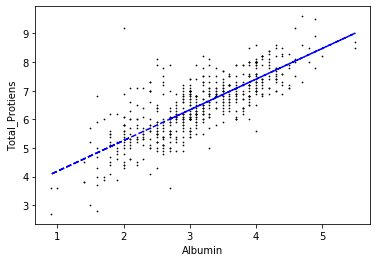

In [25]:
model = linear_model.LinearRegression()
X = np.array(data['Albumin']).reshape((len(data['Albumin']),1))
Y = np.array(data['Total_Protiens']).reshape((len(data['Total_Protiens']),1))
model.fit(X,Y)
print("Linear Regression Model Coefs:",model.coef_[0][0],model.intercept_[0])
print("The score is: ",model.score(X,Y))

Z = [1.0705124421029262*x+ 3.1191041939954083 for x in X]

pyplot.scatter(X, Y, color = 'black', s = 0.5 )
pyplot.plot(X, Z,"b--")
pyplot.xlabel('Albumin')
pyplot.ylabel('Total_Protiens')
pyplot.show()

In [28]:
data.Dataset.value_counts()

1    415
2    167
Name: Dataset, dtype: int64

## Study Albumin vs. Albumin_and_Globulin_Ratio dependency

In [40]:
#clear
out = data[data['Albumin_and_Globulin_Ratio'].isna()]
data = data[data['Albumin_and_Globulin_Ratio'].isna() ==False]


Linear Regression Model Coefs: 0.27713302978478876 0.07757212949748071
The score is:  0.475010227719443


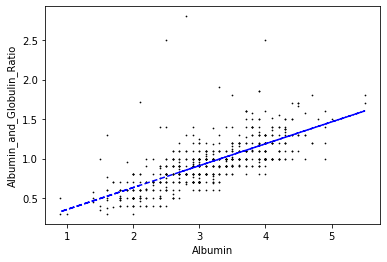

In [42]:
x_name = 'Albumin'
y_name  = 'Albumin_and_Globulin_Ratio'
model = linear_model.LinearRegression()
X = np.array(data[x_name]).reshape((len(data[x_name]),1))
Y = np.array(data[y_name]).reshape((len(data[y_name]),1))
model.fit(X,Y)
print("Linear Regression Model Coefs:",model.coef_[0][0],model.intercept_[0])
print("The score is: ",model.score(X,Y))

Z = [0.27713302978478876  *x+ 0.07757212949748071 for x in X]

pyplot.scatter(X, Y, color = 'black', s = 0.5 )
pyplot.plot(X, Z,"b--")
pyplot.xlabel(x_name)
pyplot.ylabel(y_name)
pyplot.show()

In [43]:
list(data.columns)

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset',
 'distance']

In [44]:
data = data[['Age','Gender','Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Albumin','Dataset']]

In [45]:
data.corr()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin,Dataset
Age,1.000000,-0.001784,0.078725,-0.087588,-0.263572,-0.132566
Total_Bilirubin,-0.001784,1.000000,0.230618,0.248218,-0.234893,-0.236646
Alkaline_Phosphotase,0.078725,0.230618,1.000000,0.124850,-0.163282,-0.183249
Alamine_Aminotransferase,-0.087588,0.248218,0.124850,1.000000,-0.028988,-0.163426
Albumin,-0.263572,-0.234893,-0.163282,-0.028988,1.000000,0.159035
Dataset,-0.132566,-0.236646,-0.183249,-0.163426,0.159035,1.000000


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 246 to 283
Data columns (total 7 columns):
Age                         578 non-null int64
Gender                      578 non-null object
Total_Bilirubin             578 non-null float64
Alkaline_Phosphotase        578 non-null int64
Alamine_Aminotransferase    578 non-null int64
Albumin                     578 non-null float64
Dataset                     578 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 36.1+ KB


In [83]:

liver = data[data.Dataset ==1]
non_liver = data[data.Dataset ==2]

print(f"Number of Liver patients is {len(liver)} and non-liver patients is {len(non_liver)} \n")

liver_test_number = int(0.1*len(liver))
non_liver_test_number = int(0.1*len(non_liver))
print(f"10% of liver is {liver_test_number} and 10% of non-liver is {non_liver_test_number} \n")

# display (liver)
# display(non_liver)

test_pieces = [liver[:liver_test_number],non_liver[:non_liver_test_number]]
test_set = pd.concat(test_pieces)
test_set.reset_index(drop=True)

study_pieces = [liver[liver_test_number:], non_liver[non_liver_test_number:]]
study_set= pd.concat(study_pieces)
study_set.reset_index(drop = True)


test_set.info()
print('\n')
study_set.info()


Number of Liver patients is 413 and non-liver patients is 165 

10% of liver is 41 and 10% of non-liver is 16 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 132
Data columns (total 7 columns):
Age                         57 non-null int64
Gender                      57 non-null object
Total_Bilirubin             57 non-null float64
Alkaline_Phosphotase        57 non-null int64
Alamine_Aminotransferase    57 non-null int64
Albumin                     57 non-null float64
Dataset                     57 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 3.6+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 41 to 577
Data columns (total 7 columns):
Age                         521 non-null int64
Gender                      521 non-null object
Total_Bilirubin             521 non-null float64
Alkaline_Phosphotase        521 non-null int64
Alamine_Aminotransferase    521 non-null int64
Albumin                     521 non-null float64
Da

In [84]:
test_set.Dataset.value_counts()

1    41
2    16
Name: Dataset, dtype: int64

In [85]:
study_set.Dataset.value_counts()

1    372
2    149
Name: Dataset, dtype: int64